In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/Advance_House_Price.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df[['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']]

In [5]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [7]:
df.BsmtQual.value_counts().sort_values(ascending=True)

Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [8]:
df.GarageType.value_counts().sort_values(ascending=True)

2Types       6
CarPort      9
Basment     19
BuiltIn     88
Detchd     387
Attchd     870
Name: GarageType, dtype: int64

In [7]:
df[df.BsmtQual.isnull()].shape

(37, 4)

### Compute the frequency with every feature

<IPython.core.display.Javascript object>

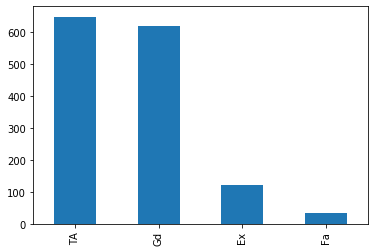

In [15]:
df.BsmtQual.value_counts().plot.bar()
plt.show()

<IPython.core.display.Javascript object>

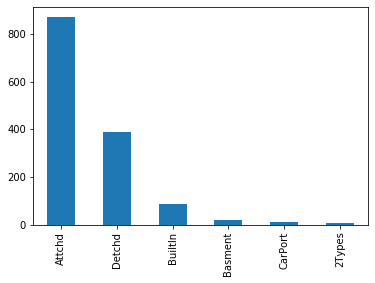

In [16]:
df.GarageType.value_counts().plot.bar()
plt.show()

<IPython.core.display.Javascript object>

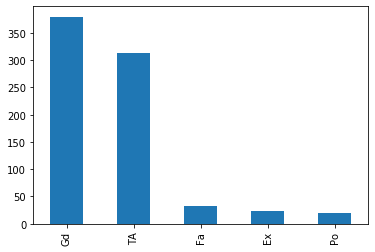

In [17]:
df.FireplaceQu.value_counts().plot.bar()
plt.show()

## Impute finction

In [33]:
df.GarageType.value_counts().index[0]

'Attchd'

In [38]:
df.GarageType.mode()[0]

'Attchd'

In [25]:
df.GarageType.fillna(df.GarageType.value_counts().index[0], inplace=True)

In [26]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [30]:
def impute_nan(df, feature):
    frequent = df[feature].value_counts().index[0]
    df[feature].fillna(frequent, inplace=True)

In [31]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [32]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantages
- Easy to implement
- Faster way to implement
### Disadvantage
- Since we're using the most frequent value, it may use them in a over represented way, if there are many NaN values (around 40-60 %) 
- It distort the relationship of the most frequent lable